# Inventory Management Data Science Project

We shall use real historical data from multiple shoe shops to decide how many shoes of each size a shop should stock. 

# Importing Packages and Datasets

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pylab as pl

Using the ```read_csv``` fucntion from the pandas library, we import our dataset.

In [72]:
sales = pd.read_csv("Al-Bundy_raw-data.csv")

## Cleaning the Data

First we inspect our data.

In [73]:
sales

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,Year,Month,SalePrice
0,52389,1/1/2014,United Kingdom,2152,UK2,Male,11.0,44,10.5,159,0.0,2014,1,159.0
1,52390,1/1/2014,United States,2230,US15,Male,11.5,44-45,11.0,199,0.2,2014,1,159.2
2,52391,1/1/2014,Canada,2160,CAN7,Male,9.5,42-43,9.0,149,0.2,2014,1,119.2
3,52392,1/1/2014,United States,2234,US6,Female,9.5,40,7.5,159,0.0,2014,1,159.0
4,52393,1/1/2014,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,159,0.0,2014,1,159.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14962,65773,12/31/2016,United Kingdom,2154,UK2,Male,9.5,42-43,9.0,139,0.0,2016,12,139.0
14963,65774,12/31/2016,United States,2181,US12,Female,12.0,42-43,10.0,149,0.0,2016,12,149.0
14964,65775,12/31/2016,Canada,2203,CAN6,Male,10.5,43-44,10.0,179,0.3,2016,12,125.3
14965,65776,12/31/2016,Germany,2231,GER1,Female,9.5,40,7.5,199,0.0,2016,12,199.0


Next we check the data type used for each column. 

In [74]:
sales.dtypes

InvoiceNo          int64
Date              object
Country           object
ProductID          int64
Shop              object
Gender            object
Size (US)        float64
Size (Europe)     object
Size (UK)        float64
UnitPrice          int64
Discount         float64
Year               int64
Month              int64
SalePrice        float64
dtype: object

We shall convert the Date datatype to datetime using the ```to_datetime``` function from the ```pandas``` package.

In [75]:
sales['Date'] = pd.to_datetime(sales['Date'])

We now reinspect our column datatypes to ensure our dates are stored as datetimes. 

In [76]:
sales.dtypes

InvoiceNo                 int64
Date             datetime64[ns]
Country                  object
ProductID                 int64
Shop                     object
Gender                   object
Size (US)               float64
Size (Europe)            object
Size (UK)               float64
UnitPrice                 int64
Discount                float64
Year                      int64
Month                     int64
SalePrice               float64
dtype: object

Create new data frame, ```sales_mini```, by dropping any columns we do not expect to use. 

In [77]:
sales_mini = sales.drop(['InvoiceNo', 'ProductID','Size (Europe)', 'Size (UK)', 'UnitPrice', 'Discount', 'Date'], axis=1)

In [78]:
sales_mini

,Country,Shop,Gender,Size (US),Year,Month,SalePrice
0,United Kingdom,UK2,Male,11.0,2014,1,159.0
1,United States,US15,Male,11.5,2014,1,159.2
2,Canada,CAN7,Male,9.5,2014,1,119.2
3,United States,US6,Female,9.5,2014,1,159.0
4,United Kingdom,UK4,Female,9.0,2014,1,159.0
...,...,...,...,...,...,...,...
14962,United Kingdom,UK2,Male,9.5,2016,12,139.0
14963,United States,US12,Female,12.0,2016,12,149.0
14964,Canada,CAN6,Male,10.5,2016,12,125.3
14965,Germany,GER1,Female,9.5,2016,12,199.0


Our data is now ready to be analysed. 

## Data Analysis and Visualisation

What a shoe size means depends on gender. Therefore to analyse our data we must seperate ```sales_mini``` into male and female data frames.

In [79]:
sales_mini_male = sales_mini[sales_mini['Gender'] == 'Male']
sales_mini_female = sales_mini[sales_mini['Gender'] == 'Female']

In [80]:
sales_mini_male

,Country,Shop,Gender,Size (US),Year,Month,SalePrice
0,United Kingdom,UK2,Male,11.0,2014,1,159.0
1,United States,US15,Male,11.5,2014,1,159.2
2,Canada,CAN7,Male,9.5,2014,1,119.2
5,United States,US15,Male,10.5,2014,1,159.0
7,Canada,CAN5,Male,10.0,2014,1,169.0
...,...,...,...,...,...,...,...
14958,Germany,GER2,Male,10.5,2016,12,89.5
14960,United States,US15,Male,9.0,2016,12,189.0
14961,United States,US13,Male,8.0,2016,12,129.0
14962,United Kingdom,UK2,Male,9.5,2016,12,139.0


In [81]:
sales_mini_female

,Country,Shop,Gender,Size (US),Year,Month,SalePrice
3,United States,US6,Female,9.5,2014,1,159.0
4,United Kingdom,UK4,Female,9.0,2014,1,159.0
6,Germany,GER2,Female,9.0,2014,1,179.0
9,United Kingdom,UK1,Female,9.0,2014,1,149.0
11,United States,US11,Female,9.5,2014,1,152.1
...,...,...,...,...,...,...,...
14957,Germany,GER1,Female,7.5,2016,12,159.0
14959,United States,US13,Female,8.0,2016,12,119.2
14963,United States,US12,Female,12.0,2016,12,149.0
14965,Germany,GER1,Female,9.5,2016,12,199.0


We shall now use ```pivot_table``` from the ```pandas``` library, to view the total number of sales of each size in each country. We will display 2 pivot tables, one for each gender. 

In [82]:
males_size_by_country = pd.pivot_table(sales_mini_male, values='Month', index=['Size (US)'], columns=['Country'],margins=True, margins_name='Total', aggfunc=len)
females_size_by_country = pd.pivot_table(sales_mini_female, values='Month', index=['Size (US)'], columns=['Country'], margins=True,margins_name='Total', aggfunc=len)

In [83]:
males_size_by_country

Country,Canada,Germany,United Kingdom,United States,Total
Size (US),,,,,
6.0,15,30,6,54,105
6.5,15,18,12,45,90
7.0,24,30,21,39,114
7.5,45,48,12,66,171
8.0,51,117,45,141,354
8.5,192,174,87,225,678
9.0,324,348,183,492,1347
9.5,375,549,225,741,1890
10.0,237,411,156,543,1347


In [84]:
females_size_by_country

Country,Canada,Germany,United Kingdom,United States,Total
Size (US),,,,,
4.5,6,9,15,21,51
5.0,6,12,9,9,36
5.5,6,9,6,42,63
6.0,21,15,12,33,81
6.5,51,84,24,93,252
7.0,93,156,27,147,423
7.5,153,222,87,318,780
8.0,192,324,168,618,1302
8.5,171,339,129,399,1038


For the sake of this project we shall assume that sales across ````'Gender'````, ```'Country'``` and ```'Year'``` are independent of one another.

For this reason we shall concentrate on sales in the ```'United States'```, in ```2016```.

In [85]:
male_2016 = sales_mini_male[sales_mini_male['Year']==2016]
male_us_2016 = male_2016[male_2016['Country']=='United States']
male_us_2016

,Country,Shop,Gender,Size (US),Year,Month,SalePrice
7617,United States,US13,Male,9.5,2016,1,125.3
7619,United States,US6,Male,8.5,2016,1,151.2
7629,United States,US3,Male,8.0,2016,1,159.0
7631,United States,US13,Male,8.0,2016,1,129.0
7632,United States,US14,Male,14.0,2016,1,169.0
...,...,...,...,...,...,...,...
14950,United States,US13,Male,9.5,2016,12,199.0
14951,United States,US14,Male,10.0,2016,12,97.3
14956,United States,US15,Male,9.5,2016,12,139.0
14960,United States,US15,Male,9.0,2016,12,189.0


We assume that sales of shoes increase and decrease in particular months, for example they may increase over the summer as more people take up exercise, or over a holiday period as more people buy presents. To make sure this doesn't distort our results we shall take a whole year of data into consideration. 

To get a simple picture of how our data is distributed, we begin by creating a pivot table to view the number of sales of each size by month. 

In [86]:
male_us_2016_by_month = pd.pivot_table(male_us_2016, values='Country', index=['Size (US)'], columns=['Month'], fill_value=0, aggfunc=len)
male_us_2016_by_month

Month,1,2,3,4,5,6,7,8,9,10,11,12
Size (US),,,,,,,,,,,,
6.0,4,1,3,1,3,3,3,4,3,7,3,0
6.5,3,2,0,1,0,0,1,7,2,1,2,1
7.0,0,0,1,0,6,4,4,2,3,0,0,0
7.5,3,2,3,1,7,0,7,3,4,6,1,1
8.0,7,9,7,3,12,2,9,4,7,5,2,6
8.5,12,12,8,8,15,9,17,17,6,9,10,6
9.0,17,13,13,11,21,22,25,30,26,25,13,10
9.5,19,25,27,24,26,33,25,47,31,44,37,26
10.0,17,26,26,19,16,31,25,24,23,31,15,20


To make the distribution of our data clearer we shall display our ```DataFrame``` in a ```heatmap``` from the ```seaborn``` library. This will also indicate whether our assumption that the ```Month``` can effect the demand was a sensible assumption. 

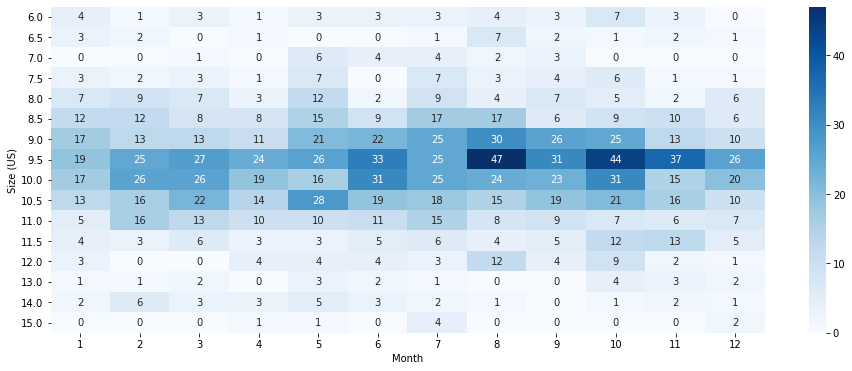

In [88]:
plt.figure(figsize=(16, 6))
male_us_2016_by_month_heatmap = sns.heatmap(male_us_2016_by_month, annot=True, fmt='g', cmap='Blues')
male_us_2016_by_month_heatmap

As we can see above, it was sensible to assume that ```'Month'``` can effect demand, however it is also clear that the overwhelming influence on demand is ```'Size (US)'```.

We shall now use ```plot.bar``` from the ```pandas``` library to illustrate how demand is distributed accross ```'Size (US)'```.

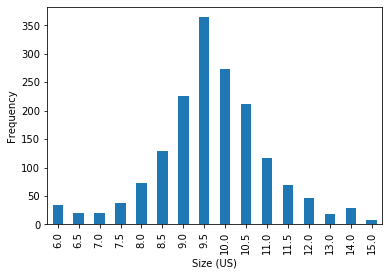

In [115]:
male_us_2016_by_month_with_total = pd.pivot_table(male_us_2016, values='Country', index=['Size (US)'], columns=['Month'], fill_value=0, margins=True, margins_name='Total', aggfunc=len)
male_us_2016_by_month_with_total_right = male_us_2016_by_month_with_total.iloc[:-1, :]
male_us_2016_by_month_with_total_right = male_us_2016_by_month_with_total_right.reset_index()
male_us_2016_total_by_size = male_us_2016_by_month_with_total_right[['Size (US)', 'Total']]
male_us_2016_by_size_plot = male_us_2016_total_by_size.plot.bar(x='Size (US)',y='Total', legend=False)
male_us_2016_by_size_plot.set_ylabel("Frequency")
male_us_2016_by_size_plot

From the bar chart shown above we can see that demand for shoes is distributed over ```'Size (US)'``` in a normal distribution (a bell shaped curve).

Since we are analysing a relatively small dataset, that roughly follows a normal distribution, we shall perform a 2-tailed, Student's T-test to find a stock interval for each size. We will be able to say, with 95% certainty, that the retailer would need their stock levels to be within these intervals for their store to be correctly stocked.

## Further Analysis: Student's T-test

We shall include a total of all stock, accross all sizes for the retailers convenience.

In [58]:
male_us_2016_by_month_with_total_bottom = male_us_2016_by_month_with_total.iloc[:, :-1]
male_us_2016_by_month_with_total_bottom = male_us_2016_by_month_with_total_bottom.reset_index()
male_us_2016_by_month_with_total_bottom

Month,Size (US),1,2,3,4,5,6,7,8,9,10,11,12
0,6,4,1,3,1,3,3,3,4,3,7,3,0
1,6.5,3,2,0,1,0,0,1,7,2,1,2,1
2,7,0,0,1,0,6,4,4,2,3,0,0,0
3,7.5,3,2,3,1,7,0,7,3,4,6,1,1
4,8,7,9,7,3,12,2,9,4,7,5,2,6
5,8.5,12,12,8,8,15,9,17,17,6,9,10,6
6,9,17,13,13,11,21,22,25,30,26,25,13,10
7,9.5,19,25,27,24,26,33,25,47,31,44,37,26
8,10,17,26,26,19,16,31,25,24,23,31,15,20
9,10.5,13,16,22,14,28,19,18,15,19,21,16,10


To perform a Student's T-test, we must first calculate our ```t_value```. ```scipy.stats``` can look up this value for us using the ```t.ppf``` function. Since we are trying to find an upper and lower bound for each stock level, we must perform a 2-tailed test. For this reason we use 2.5% (5% divided by 2), rather than 5% when looking up our ```t-value```. 

In [117]:
t_value = stats.t.ppf(1-0.025,11)
t_value

2.200985160082949

We shall now display our aggregates in a new ```DataFrame```. We use the ```sem``` function from the ```pandas``` library to calculate the ```'Standard Error'```. To find the ```'Margin Error'``` we multiply the ```'Standard Error'``` by the ```t_value```. Our lower and upper bounds are calculated by subtracting and adding our ```'Margin Error'``` from and to the ```'Mean'``` respectively. 

In [19]:
male_us_2016_agg = pd.DataFrame()
male_us_2016_agg['Size (US)'] = male_us_2016_by_month_with_total['Size (US)']
male_us_2016_agg['Mean'] = male_us_2016_by_month_with_total.mean(1)
male_us_2016_agg['Standard Error'] = male_us_2016_by_month_with_total.sem(1)
male_us_2016_agg['Margin Error'] = male_us_2016_agg['Standard Error'] * t_value
male_us_2016_agg['95% CI Lower Bound'] = male_us_2016_agg['Mean'] - male_us_2016_agg['Margin Error']
male_us_2016_agg['95% CI Upper Bound'] = male_us_2016_agg['Mean'] + male_us_2016_agg['Margin Error']
male_us_2016_agg

,Size (US),Mean,Standard Error,Margin Error,95% CI Lower Bound,95% CI Upper Bound
0,6,2.916667,0.514315,1.132000,1.784666,4.048667
1,6.5,1.666667,0.555050,1.221657,0.445009,2.888324
2,7,1.666667,0.607196,1.336429,0.330237,3.003096
3,7.5,3.166667,0.694495,1.528573,1.638094,4.695240
4,8,6.083333,0.882990,1.943448,4.139885,8.026782
5,8.5,10.750000,1.122261,2.470080,8.279920,13.220080
6,9,18.833333,1.968823,4.333349,14.499984,23.166683
7,9.5,30.333333,2.447427,5.386751,24.946583,35.720084
8,10,22.750000,1.567303,3.449611,19.300389,26.199611
9,10.5,17.583333,1.367692,3.010269,14.573064,20.593603


## Retailer Friendly Anlysis

First create a new ```DataFrame``` made using the aggregates most relevant to a retailer, those being the bounds. Our bounds above don't make sense as you can only have whole numbers of pairs of shoes. To account for this we us the ```numpy``` functions ```ceil``` and ```floor``` to round the ```'Lower Bound'``` up and the ```'Upper Bound'``` down to the nearest whole numbers repsectively. To remove the ```.0``` from the end of our bounds we use the ```astype``` function to display our bounds as integers.

In [118]:
conclusion = pd.DataFrame()
conclusion['Size (US)'] = male_us_2016_agg['Size (US)']
conclusion['Lower Bound'] = male_us_2016_agg['95% CI Lower Bound'].apply(np.ceil)
conclusion['Lower Bound'] = conclusion['Lower Bound'].astype(int)
conclusion['Upper Bound'] = male_us_2016_agg['95% CI Upper Bound'].apply(np.floor)
conclusion['Upper Bound'] = conclusion['Upper Bound'].astype(int)

We now take our ```'Lower Bound'``` and ```'Upper Bound'``` for each size, and translate them into a retailer friendly output (see ```'Conclusion'``` column below).

In [119]:
conclusion['Conclusion'] = np.where(conclusion['Size (US)'] == 'Total', 'Based on data from 2016, we would expect, with 95% confidence, to sell atleast ' + conclusion['Lower Bound'].astype(str) + ' pair(s), and upto ' + conclusion['Upper Bound'].astype(str) + ' pair(s) of shoes in a US store each month.', 'Based on data from 2016, we would expect, with 95% confidence, to sell atleast ' + conclusion['Lower Bound'].astype(str) + ' pair(s), and upto ' + conclusion['Upper Bound'].astype(str) + ' pair(s) of size ' + conclusion['Size (US)'].astype(str) + ' shoes in a US store each month.')
pd.set_option('display.max_colwidth',200)
conclusion

,Size (US),Lower Bound,Upper Bound,Conclusion
0,6,2,4,"Based on data from 2016, we would expect, with 95% confidence, to sell atleast 2 pair(s), and upto 4 pair(s) of size 6.0 shoes in a US store each month."
1,6.5,1,2,"Based on data from 2016, we would expect, with 95% confidence, to sell atleast 1 pair(s), and upto 2 pair(s) of size 6.5 shoes in a US store each month."
2,7,1,3,"Based on data from 2016, we would expect, with 95% confidence, to sell atleast 1 pair(s), and upto 3 pair(s) of size 7.0 shoes in a US store each month."
3,7.5,2,4,"Based on data from 2016, we would expect, with 95% confidence, to sell atleast 2 pair(s), and upto 4 pair(s) of size 7.5 shoes in a US store each month."
4,8,5,8,"Based on data from 2016, we would expect, with 95% confidence, to sell atleast 5 pair(s), and upto 8 pair(s) of size 8.0 shoes in a US store each month."
5,8.5,9,13,"Based on data from 2016, we would expect, with 95% confidence, to sell atleast 9 pair(s), and upto 13 pair(s) of size 8.5 shoes in a US store each month."
6,9,15,23,"Based on data from 2016, we would expect, with 95% confidence, to sell atleast 15 pair(s), and upto 23 pair(s) of size 9.0 shoes in a US store each month."
7,9.5,25,35,"Based on data from 2016, we would expect, with 95% confidence, to sell atleast 25 pair(s), and upto 35 pair(s) of size 9.5 shoes in a US store each month."
8,10,20,26,"Based on data from 2016, we would expect, with 95% confidence, to sell atleast 20 pair(s), and upto 26 pair(s) of size 10.0 shoes in a US store each month."
9,10.5,15,20,"Based on data from 2016, we would expect, with 95% confidence, to sell atleast 15 pair(s), and upto 20 pair(s) of size 10.5 shoes in a US store each month."


## Possibly Further Analysis

The same analysis above can all be completed for different ```'Gender'```, ```'Country'``` and ```'Year'``` values. In total this would produce 2 x 4 x 3 = 24 different sets of bounds to guide the retailer. These bounds could be used to guide a retailer in each specific circumstance. Alternatively, if these results don't differ much we may use this as a reason to use a larger data set. For example, if our bounds don't change much for each ```'Year'```, we may want to use the ```'Male'``` ```'United States'``` data from all years to get a more accurate result.